In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, make_scorer, f1_score
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sreechandanakurella/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
column_names = ['Target', 'id', 'Date', 'Flag', 'User', 'Text']
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1', names=column_names)
df.index = df.index + 1
df.head()

,Target,id,Date,Flag,User,Text
1,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
2,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
3,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
4,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
5,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# Data PreProcessing

## Data Extraction 

In [30]:
req_d = df[['Target','Text']]
req_d.head(10)

,Target,Text
1,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
2,0,is upset that he can't update his Facebook by ...
3,0,@Kenichan I dived many times for the ball. Man...
4,0,my whole body feels itchy and like its on fire
5,0,"@nationwideclass no, it's not behaving at all...."
6,0,@Kwesidei not the whole crew
7,0,Need a hug
8,0,@LOLTrish hey long time no see! Yes.. Rains a...
9,0,@Tatiana_K nope they didn't have it
10,0,@twittera que me muera ?


## Data Cleaning

In [5]:
def text_cleaning(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Removing mentions
    text = re.sub(r'https?://[A-Za-z0-9./]+', '', text)  # Removing URLs
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Removing non-alphabetic characters
    text = ' '.join([word for word in text.split() if word.lower() not in stopwords.words('english') and word.lower() not in ENGLISH_STOP_WORDS])
    return text.lower()
req_d['Text'] = req_d['Text'].apply(text_cleaning)

/var/folders/gx/l9lsx5qn4yvgkddyh12mxt9h0000gn/T/ipykernel_95144/430986170.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req_d['Text'] = req_d['Text'].apply(text_cleaning)


In [6]:
req_d.head()

,Target,Text
1,0,awww bummer shoulda got david carr day
2,0,upset update facebook texting result school to...
3,0,dived times ball managed save rest bounds
4,0,body feels itchy like
5,0,behaving mad


## Split the dataset into training and testing sets 

In [37]:
text_test,text_train,tar_test,tar_train = train_test_split(req_d['Text'],req_d['Target'],test_size=0.33, random_state=42)
print(tar_train,text_train)

541201     0
751        0
766712     0
285056     0
705996     0
          ..
967371     4
918521     4
1292839    4
326643     0
195520     0
Name: Target, Length: 528000, dtype: int64 541201                @chrishasboobs AHHH I HOPE YOUR OK!!! 
751        @misstoriblack cool , i have no tweet apps  fo...
766712     @TiannaChaos i know  just family drama. its la...
285056     School email won't open  and I have geography ...
705996                                upper airways problem 
                                 ...                        
967371     Such a good vibe here in twitter-land... alway...
918521     ...and a big bag to take up as well as a rain ...
1292839             happy no doubt day. i am pretty excited 
326643     Just bought a shirt that says &quot;wave goodb...
195520     @tommcfly plz say &quot;Happy Birthday Or , Ro...
Name: Text, Length: 528000, dtype: object


# Feature Extraction ( Bag of Words ) 

In [8]:
bow = CountVectorizer()
text_train_bow = bow.fit_transform(text_train)
text_test_bow = bow.transform(text_test)

# Implementation of Sentiment Analysis

## NB (Naive Bayes)

In [9]:
nb_clf = MultinomialNB()
nb_clf.fit(text_train_bow , tar_train)
nb_pred = nb_clf.predict(text_test_bow)

## LR (Logistic Regression)

In [10]:
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(text_train_bow , tar_train)
lr_pred = lr_clf.predict(text_test_bow)

## DT (Decision Tree)

In [16]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(text_train_bow , tar_train)
dt_pred = dt_clf.predict(text_test_bow)

# Evaluation

In [17]:
def evaluate_model(y_true, y_pred, model_name):
    f1 = f1_score(y_true, y_pred, pos_label=4)
    precision = precision_score(y_true, y_pred, pos_label=4)
    recall = recall_score(y_true, y_pred, pos_label=4)
    
    print(f"{model_name} Evaluation Metrics:")
    print(f"F1-Score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

In [18]:
evaluate_model(tar_test, nb_pred ,"Naive Bayes")

Naive Bayes Evaluation Metrics:
F1-Score: 0.7585531905337579
Precision: 0.7599169858437241
Recall: 0.7571942815619039
Confusion Matrix:
[[408618 128061]
 [129979 405342]]


In [19]:
evaluate_model(tar_test, lr_pred ,"Logistic Regression")

Logistic Regression Evaluation Metrics:
F1-Score: 0.7720450818889432
Precision: 0.7522356001828886
Recall: 0.792926113490784
Confusion Matrix:
[[396871 139808]
 [110851 424470]]


In [20]:
evaluate_model(tar_test, dt_pred ,"Decision Tree")

Decision Tree Evaluation Metrics:
F1-Score: 0.6973659543881763
Precision: 0.7034085769343332
Recall: 0.6914262657358856
Confusion Matrix:
[[380612 156067]
 [165186 370135]]


# Comparison and Discussion

### Naive Bayes vs. Logistic Regression:
#### F1-Score: 
Naive Bayes: 0.7586 <br> 
Logistic Regression: 0.7720 <br> 
Logistic Regression performs slightly better in terms of F1-Score.

#### Precision:
Naive Bayes: 0.7599 <br> 
Logistic Regression: 0.7522 <br> 
Naive Bayes has a slightly higher precision. 

#### Recall:
Naive Bayes: 0.7572 <br> 
Logistic Regression: 0.7929 <br> 
Logistic Regression has a higher recall.

 ## Findings and Analysis

Logistic Regression has higher F1 score. It suggests that it maintains a better balance between Precision and Recall. It implies that LR is more effective at identifying both Positive and Negative sentiments

It's Higher Recall suggests that it is more effective at finding out Positives out of all the positives

This is because LR is a Discriminative model, more flexible and measures relationship between output variable

However generative model like NB reach their asymptotic faster and require less computational expense 

For Large Datasets LR in most cases is better than NB 


# Extra Credit

## Using different feature extraction

### Tfidf using unigrams and bigrams

They have different scores from before

## Visualization 

### Heatmap using confusion matrix 

In [21]:
# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(tar_test, nb_pred)

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(tar_test, lr_pred)

# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(tar_test, dt_pred)

Text(0.5, 1.0, 'Naive Bayes Confusion Matrix')

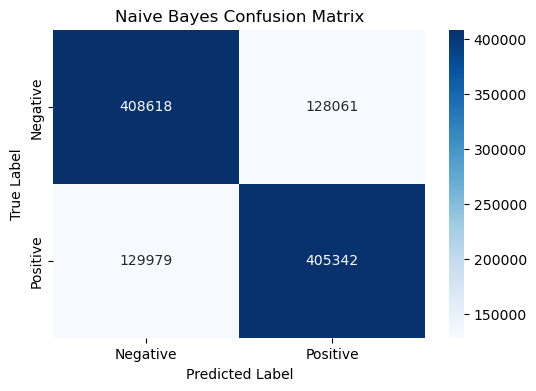

In [38]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Naive Bayes Confusion Matrix')

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

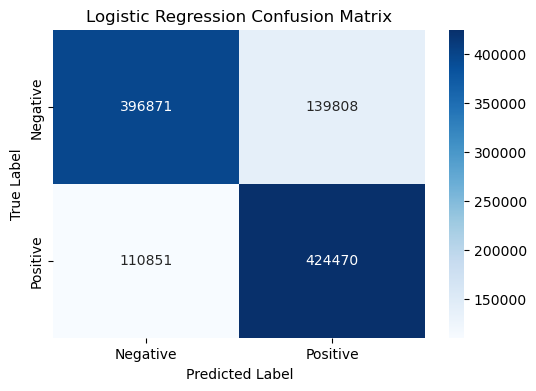

In [49]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix')

Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

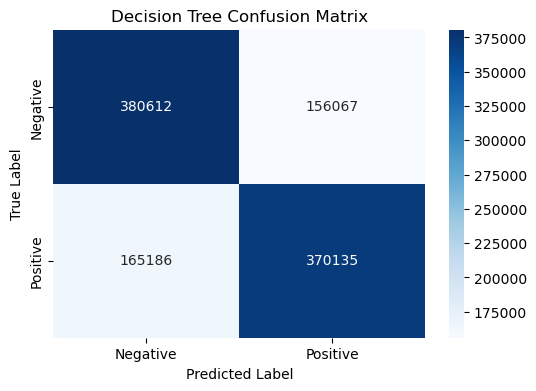

In [50]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree Confusion Matrix')

### Roc-Auc curve 

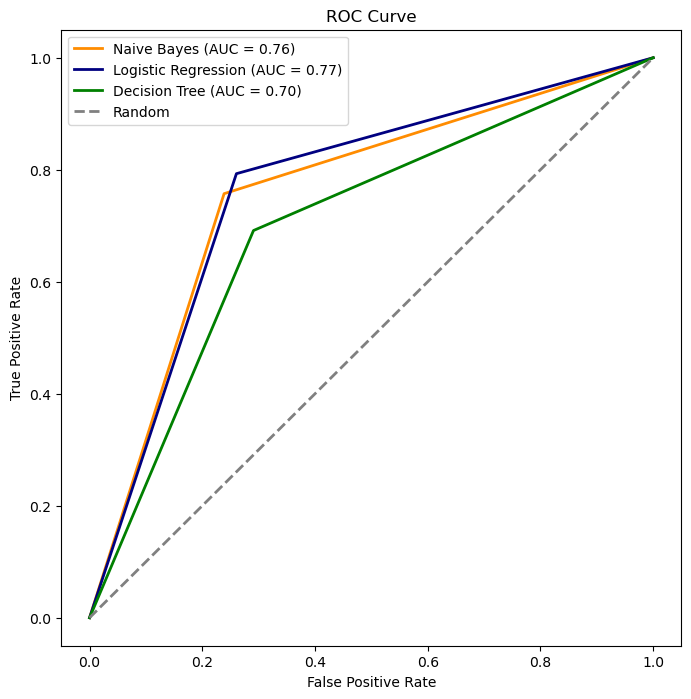

In [25]:
# ROC Curve for Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(tar_test, nb_pred, pos_label= 4)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# ROC Curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(tar_test, lr_pred, pos_label= 4)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# ROC Curve for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(tar_test, dt_pred, pos_label= 4)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC Curves
plt.figure(figsize=(8,8))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot(fpr_lr, tpr_lr, color='navy', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})') 
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Logistic Regression's ROC have more Area Under the Curve(AUC). That implies it is better at classifying this dataset.

## Cross Validation

In [28]:
# Define the scorer with pos_label
f1_scorer = make_scorer(f1_score, pos_label=4)

# Cross-validation for Naive Bayes
nb_cv_scores = cross_val_score(nb_clf, text_train_bow, tar_train, scoring=f1_scorer)

# Cross-validation for Logistic Regression
lr_cv_scores = cross_val_score(lr_clf, text_train_bow, tar_train, scoring=f1_scorer)

# Cross-validation for Decision Tree
dt_cv_scores = cross_val_score(dt_clf, text_train_bow, tar_train, scoring=f1_scorer)

# Print cross-validation scores
print(f'Naive Bayes Cross-Validation Scores: {nb_cv_scores}')
print(f'Logistic Regression Cross-Validation Scores: {lr_cv_scores}')
print(f'Decision Tree Cross-Validation Scores: {dt_cv_scores}')

Naive Bayes Cross-Validation Scores: [0.75931273 0.75864552 0.75987082 0.75771902 0.75903991]
Logistic Regression Cross-Validation Scores: [0.77046977 0.77135762 0.7727139  0.7704743  0.77326271]
Decision Tree Cross-Validation Scores: [0.69426206 0.69587414 0.69692083 0.69626445 0.69714253]


Both Classifiers seems to be consistent but <br>
Logistic Regression have higher values <br>
Therefore LR is better for this Dataset

In [48]:
ran_text = input("Enter a text: ")
prediction = lr_clf.predict(bow.transform([text_cleaning(ran_text)]))
if(prediction):
    print("Output: Positive")
else:
    print("Output: Negative")


Enter a text: my whole body feels itchy and like its on fire 
Output: Negative


# References

https://docs.python.org/3/library/re.html<br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html<br>
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html<br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html<br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html <br>
{<br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html<br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#:~:text=Compute%20the%20recall.,find%20all%20the%20positive%20samples<br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html<br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html<br>
}<br>
https://medium.com/@sangha_deb/naive-bayes-vs-logistic-regression-a319b07a5d4c<br>
https://www.geeksforgeeks.org/feature-extraction-techniques-nlp/#<br>
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html<br>
https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc#:~:text=An%20ROC%20curve%20(receiver%20operating,False%20Positive%20Rate<br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html<br>